In [10]:
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from IPython.display import display, Audio

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/SpeakerIdentification

/content/drive/MyDrive/SpeakerIdentification


In [5]:

!pwd

/content/drive/MyDrive/SpeakerIdentification


In [6]:
!unzip "/content/drive/MyDrive/SpeakerIdentification/audio.zip"

Streaming output truncated to the last 5000 lines.
  inflating: audio/Jens_Stoltenberg/560.wav  
  inflating: audio/Jens_Stoltenberg/561.wav  
  inflating: audio/Jens_Stoltenberg/562.wav  
  inflating: audio/Jens_Stoltenberg/563.wav  
  inflating: audio/Jens_Stoltenberg/564.wav  
  inflating: audio/Jens_Stoltenberg/565.wav  
  inflating: audio/Jens_Stoltenberg/566.wav  
  inflating: audio/Jens_Stoltenberg/567.wav  
  inflating: audio/Jens_Stoltenberg/568.wav  
  inflating: audio/Jens_Stoltenberg/569.wav  
  inflating: audio/Jens_Stoltenberg/57.wav  
  inflating: audio/Jens_Stoltenberg/570.wav  
  inflating: audio/Jens_Stoltenberg/571.wav  
  inflating: audio/Jens_Stoltenberg/572.wav  
  inflating: audio/Jens_Stoltenberg/573.wav  
  inflating: audio/Jens_Stoltenberg/574.wav  
  inflating: audio/Jens_Stoltenberg/575.wav  
  inflating: audio/Jens_Stoltenberg/576.wav  
  inflating: audio/Jens_Stoltenberg/577.wav  
  inflating: audio/Jens_Stoltenberg/578.wav  
  inflating: audio/Jens_Stolte

In [7]:
!unzip "/content/drive/MyDrive/SpeakerIdentification/yasasi.zip"

Archive:  /content/drive/MyDrive/SpeakerIdentification/yasasi.zip
  inflating: yasasi/0.wav            
  inflating: yasasi/1.wav            
  inflating: yasasi/10.wav           
  inflating: yasasi/11.wav           
  inflating: yasasi/12.wav           
  inflating: yasasi/13.wav           
  inflating: yasasi/14.wav           
  inflating: yasasi/15.wav           
  inflating: yasasi/16.wav           
  inflating: yasasi/17.wav           
  inflating: yasasi/18.wav           
  inflating: yasasi/19.wav           
  inflating: yasasi/2.wav            
  inflating: yasasi/20.wav           
  inflating: yasasi/21.wav           
  inflating: yasasi/22.wav           
  inflating: yasasi/23.wav           
  inflating: yasasi/24.wav           
  inflating: yasasi/25.wav           
  inflating: yasasi/26.wav           
  inflating: yasasi/27.wav           
  inflating: yasasi/28.wav           
  inflating: yasasi/29.wav           
  inflating: yasasi/3.wav            
  inflating: yasasi/30

In [8]:
!rm -rf /content/drive/MyDrive/SpeakerIdentification/audio/Benjamin_Netanyau

!cp -avr /content/drive/MyDrive/SpeakerIdentification/yasasi /content/drive/MyDrive/SpeakerIdentification/audio

'/content/drive/MyDrive/SpeakerIdentification/yasasi' -> '/content/drive/MyDrive/SpeakerIdentification/audio/yasasi'
'/content/drive/MyDrive/SpeakerIdentification/yasasi/0.wav' -> '/content/drive/MyDrive/SpeakerIdentification/audio/yasasi/0.wav'
'/content/drive/MyDrive/SpeakerIdentification/yasasi/1.wav' -> '/content/drive/MyDrive/SpeakerIdentification/audio/yasasi/1.wav'
'/content/drive/MyDrive/SpeakerIdentification/yasasi/10.wav' -> '/content/drive/MyDrive/SpeakerIdentification/audio/yasasi/10.wav'
'/content/drive/MyDrive/SpeakerIdentification/yasasi/11.wav' -> '/content/drive/MyDrive/SpeakerIdentification/audio/yasasi/11.wav'
'/content/drive/MyDrive/SpeakerIdentification/yasasi/12.wav' -> '/content/drive/MyDrive/SpeakerIdentification/audio/yasasi/12.wav'
'/content/drive/MyDrive/SpeakerIdentification/yasasi/13.wav' -> '/content/drive/MyDrive/SpeakerIdentification/audio/yasasi/13.wav'
'/content/drive/MyDrive/SpeakerIdentification/yasasi/14.wav' -> '/content/drive/MyDrive/SpeakerIdenti

In [9]:
!rm -rf "/content/drive/MyDrive/SpeakerIdentification/audio/Magaret_Tarcher"
!rm -rf "/content/drive/MyDrive/SpeakerIdentification/audio/Julia_Gillard"

In [12]:
DATASET_ROOT = r"/content/drive/MyDrive/SpeakerIdentification/audio"

AUDIO_SUBFOLDER = "audio"
NOISE_SUBFOLDER = "noise"

DATASET_AUDIO_PATH = os.path.join(DATASET_ROOT, AUDIO_SUBFOLDER)
DATASET_NOISE_PATH = os.path.join(DATASET_ROOT, NOISE_SUBFOLDER)

In [13]:
VALID_SPLIT = 0.1

SHUFFLE_SEED = 43

SAMPLING_RATE = 16000

SCALE = 0.5

BATCH_SIZE = 128

EPOCHS = 10

In [14]:

if os.path.exists(DATASET_AUDIO_PATH) is False:
    os.makedirs(DATASET_AUDIO_PATH)

if os.path.exists(DATASET_NOISE_PATH) is False:
    os.makedirs(DATASET_NOISE_PATH)

for folder in os.listdir(DATASET_ROOT):
    if os.path.isdir(os.path.join(DATASET_ROOT, folder)):
        if folder in [AUDIO_SUBFOLDER, NOISE_SUBFOLDER]:
            
            continue
        elif folder in ["other", "_background_noise_"]:
           
            shutil.move(
                os.path.join(DATASET_ROOT, folder),
                os.path.join(DATASET_NOISE_PATH, folder),
            )
        else:
          
            shutil.move(
                os.path.join(DATASET_ROOT, folder),
                os.path.join(DATASET_AUDIO_PATH, folder),
            )

In [15]:

noise_paths = []
for subdir in os.listdir(DATASET_NOISE_PATH):
    subdir_path = Path(DATASET_NOISE_PATH) / subdir
    if os.path.isdir(subdir_path):
        noise_paths += [
            os.path.join(subdir_path, filepath)
            for filepath in os.listdir(subdir_path)
            if filepath.endswith(".wav")
        ]

print("Found {} files belonging to {} directories".format(len(noise_paths), len(os.listdir(DATASET_NOISE_PATH))))

Found 6 files belonging to 2 directories


In [16]:
command = (
    "for dir in `ls -1 " + DATASET_NOISE_PATH + "`; do "
    "for file in `ls -1 " + DATASET_NOISE_PATH + "/$dir/*.wav`; do "
    "sample_rate=`ffprobe -hide_banner -loglevel panic -show_streams "
    "$file | grep sample_rate | cut -f2 -d=`; "
    "if [ $sample_rate -ne 16000 ]; then "
    "ffmpeg -hide_banner -loglevel panic -y "
    "-i $file -ar 16000 temp.wav; "
    "mv temp.wav $file; "
    "fi; done; done"
)
os.system(command)


def load_noise_sample(path):
    sample, sampling_rate = tf.audio.decode_wav(
        tf.io.read_file(path), desired_channels=1
    )
    if sampling_rate == SAMPLING_RATE:
        
        slices = int(sample.shape[0] / SAMPLING_RATE)
        sample = tf.split(sample[: slices * SAMPLING_RATE], slices)
        return sample
    else:
        print("Sampling rate for {} is incorrect. Ignoring it".format(path))
        return None


noises = []
for path in noise_paths:
    sample = load_noise_sample(path)
    if sample:
        noises.extend(sample)
noises = tf.stack(noises)

print(
    "{} noise files were split into {} noise samples where each is {} sec. long".format(
        len(noise_paths), noises.shape[0], noises.shape[1] // SAMPLING_RATE
    )
)

6 noise files were split into 354 noise samples where each is 1 sec. long


In [17]:
def paths_and_labels_to_dataset(audio_paths, labels):
    """Constructs a dataset of audios and labels."""
    path_ds = tf.data.Dataset.from_tensor_slices(audio_paths)
    audio_ds = path_ds.map(lambda x: path_to_audio(x))
    label_ds = tf.data.Dataset.from_tensor_slices(labels)
    return tf.data.Dataset.zip((audio_ds, label_ds))


def path_to_audio(path):
    """Reads and decodes an audio file."""
    audio = tf.io.read_file(path)
    audio, _ = tf.audio.decode_wav(audio, 1, SAMPLING_RATE)
    return audio


def add_noise(audio, noises=None, scale=0.5):
    if noises is not None:
       
        tf_rnd = tf.random.uniform(
            (tf.shape(audio)[0],), 0, noises.shape[0], dtype=tf.int32
        )
        noise = tf.gather(noises, tf_rnd, axis=0)


        prop = tf.math.reduce_max(audio, axis=1) / tf.math.reduce_max(noise, axis=1)
        prop = tf.repeat(tf.expand_dims(prop, axis=1), tf.shape(audio)[1], axis=1)


        audio = audio + noise * prop * scale

    return audio


def audio_to_fft(audio):

    audio = tf.squeeze(audio, axis=-1)
    fft = tf.signal.fft(
        tf.cast(tf.complex(real=audio, imag=tf.zeros_like(audio)), tf.complex64)
    )
    fft = tf.expand_dims(fft, axis=-1)


    return tf.math.abs(fft[:, : (audio.shape[1]), :])




class_names = os.listdir(DATASET_AUDIO_PATH)
print("Our class names: {}".format(class_names,))

audio_paths = []
labels = []
for label, name in enumerate(class_names):
    print("Processing speaker {}".format(name,))
    dir_path = Path(DATASET_AUDIO_PATH) / name
    speaker_sample_paths = [
        os.path.join(dir_path, filepath)
        for filepath in os.listdir(dir_path)
        if filepath.endswith(".wav")
    ]
    audio_paths += speaker_sample_paths
    labels += [label] * len(speaker_sample_paths)

print(
    "Found {} files belonging to {} classes.".format(len(audio_paths), len(class_names))
)


rng = np.random.RandomState(SHUFFLE_SEED)
rng.shuffle(audio_paths)
rng = np.random.RandomState(SHUFFLE_SEED)
rng.shuffle(labels)


num_val_samples = int(VALID_SPLIT * len(audio_paths))
print("Using {} files for training.".format(len(audio_paths) - num_val_samples))
train_audio_paths = audio_paths[:-num_val_samples]
train_labels = labels[:-num_val_samples]

print("Using {} files for validation.".format(num_val_samples))
valid_audio_paths = audio_paths[-num_val_samples:]
valid_labels = labels[-num_val_samples:]


train_ds = paths_and_labels_to_dataset(train_audio_paths, train_labels)
train_ds = train_ds.shuffle(buffer_size=BATCH_SIZE * 8, seed=SHUFFLE_SEED).batch(
    BATCH_SIZE
)

valid_ds = paths_and_labels_to_dataset(valid_audio_paths, valid_labels)
valid_ds = valid_ds.shuffle(buffer_size=32 * 8, seed=SHUFFLE_SEED).batch(32)





train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)
train_ds = train_ds.map(lambda x, y: (add_noise(x, noises, scale=SCALE), y))
print("--------")
print(train_ds)


valid_ds = valid_ds.prefetch(tf.data.experimental.AUTOTUNE)
valid_ds = valid_ds.map(lambda x, y: (add_noise(x, noises, scale=SCALE), y))

Our class names: ['Jens_Stoltenberg', 'Nelson_Mandela', 'yasasi']
Processing speaker Jens_Stoltenberg
Processing speaker Nelson_Mandela
Processing speaker yasasi
Found 3061 files belonging to 3 classes.
Using 2755 files for training.
Using 306 files for validation.
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
--------
<MapDataset shapes: ((None, 16000, 1), (None,)), types: (tf.float32, tf.int32)>


In [18]:
def residual_block(x, filters, conv_num=3, activation="relu"):
  
    s = keras.layers.Conv1D(filters, 1, padding="same")(x)
    for i in range(conv_num - 1):
        x = keras.layers.Conv1D(filters, 3, padding="same")(x)
        x = keras.layers.Activation(activation)(x)
    x = keras.layers.Conv1D(filters, 3, padding="same")(x)
    x = keras.layers.Add()([x, s])
    x = keras.layers.Activation(activation)(x)
    return keras.layers.MaxPool1D(pool_size=2, strides=2)(x)


def build_model(input_shape, num_classes):
    inputs = keras.layers.Input(shape=input_shape, name="input")

    x = residual_block(inputs, 16, 2)
    x = residual_block(x, 32, 2)
    x = residual_block(x, 64, 3)
    x = residual_block(x, 128, 3)
    x = residual_block(x, 128, 3)

    x = keras.layers.AveragePooling1D(pool_size=3, strides=3)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(256, activation="relu")(x)
    x = keras.layers.Dense(128, activation="relu")(x)

    outputs = keras.layers.Dense(num_classes, activation="softmax", name="output")(x)

    return keras.models.Model(inputs=inputs, outputs=outputs)


model = build_model((SAMPLING_RATE, 1), len(class_names))

model.summary()


model.compile(
    optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)


model_save_filename = "model.h5"

earlystopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
mdlcheckpoint_cb = keras.callbacks.ModelCheckpoint(
    model_save_filename, monitor="val_accuracy", save_best_only=True
)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 16000, 1)]   0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 16000, 16)    64          input[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 16000, 16)    0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 16000, 16)    784         activation[0][0]                 
______________________________________________________________________________________________

In [19]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=valid_ds,
    callbacks=[earlystopping_cb, mdlcheckpoint_cb],
)

Epoch 1/10
22/22 [==============================] - 46s 508ms/step - loss: 0.6846 - accuracy: 0.6595 - val_loss: 0.3280 - val_accuracy: 0.8791


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
22/22 [==============================] - 11s 436ms/step - loss: 0.2491 - accuracy: 0.9205 - val_loss: 0.1428 - val_accuracy: 0.9608
Epoch 3/10
22/22 [==============================] - 11s 439ms/step - loss: 0.1569 - accuracy: 0.9568 - val_loss: 0.0927 - val_accuracy: 0.9739
Epoch 4/10
22/22 [==============================] - 11s 454ms/step - loss: 0.1102 - accuracy: 0.9731 - val_loss: 0.0680 - val_accuracy: 0.9837
Epoch 5/10
22/22 [==============================] - 11s 446ms/step - loss: 0.0903 - accuracy: 0.9771 - val_loss: 0.0666 - val_accuracy: 0.9804
Epoch 6/10
22/22 [==============================] - 11s 439ms/step - loss: 0.0787 - accuracy: 0.9786 - val_loss: 0.0635 - val_accuracy: 0.9837
Epoch 7/10
22/22 [==============================] - 11s 439ms/step - loss: 0.0760 - accuracy: 0.9786 - val_loss: 0.0604 - val_accuracy: 0.9837
Epoch 8/10
22/22 [==============================] - 11s 435ms/step - loss: 0.0775 - accuracy: 0.9779 - val_loss: 0.0691 - val_accuracy: 0.9837

In [1]:
import tensorflow
print(tensorflow.__version__)

2.5.0


In [2]:
!python --version

Python 3.7.10


In [20]:
print(model.evaluate(valid_ds))

10/10 [==============================] - 1s 48ms/step - loss: 0.0709 - accuracy: 0.9804
[0.07089518755674362, 0.9803921580314636]


In [21]:
print(valid_ds)

<MapDataset shapes: ((None, 16000, 1), (None,)), types: (tf.float32, tf.int32)>


In [22]:
SAMPLES_TO_DISPLAY = 10

test_ds = paths_and_labels_to_dataset(valid_audio_paths, valid_labels)
test_ds = test_ds.shuffle(buffer_size=BATCH_SIZE * 8, seed=SHUFFLE_SEED).batch(
    BATCH_SIZE
)

test_ds = test_ds.map(lambda x, y: (add_noise(x, noises, scale=SCALE), y))

print(test_ds)
print(valid_ds)

for audios, labels in test_ds.take(1):

    ffts = audio_to_fft(audios)

    y_pred = model.predict(audios)

    rnd = np.random.randint(0, BATCH_SIZE, SAMPLES_TO_DISPLAY)
    audios = audios.numpy()[rnd, :, :]
    labels = labels.numpy()[rnd]
    y_pred = np.argmax(y_pred, axis=-1)[rnd]

    for index in range(SAMPLES_TO_DISPLAY):

        print(
            "Speaker:\33{} {}\33[0m\tPredicted:\33{} {}\33[0m".format(
                "[92m" if labels[index] == y_pred[index] else "[91m",
                class_names[labels[index]],
                "[92m" if labels[index] == y_pred[index] else "[91m",
                class_names[y_pred[index]],
            )
        )
        if labels[index] ==y_pred[index] and model.evaluate(test_ds)[1] > 0.90:

            print(y_pred[index])
            print("Welcome")
        else:
            print("Sorry")


<MapDataset shapes: ((None, 16000, 1), (None,)), types: (tf.float32, tf.int32)>
<MapDataset shapes: ((None, 16000, 1), (None,)), types: (tf.float32, tf.int32)>
Speaker: Nelson_Mandela	Predicted: Nelson_Mandela
3/3 [==============================] - 1s 300ms/step - loss: 0.0686 - accuracy: 0.9804
1
Welcome
Speaker: Jens_Stoltenberg	Predicted: Jens_Stoltenberg
3/3 [==============================] - 1s 131ms/step - loss: 0.0622 - accuracy: 0.9837
0
Welcome
Speaker: Nelson_Mandela	Predicted: Nelson_Mandela
3/3 [==============================] - 1s 130ms/step - loss: 0.0637 - accuracy: 0.9837
1
Welcome
Speaker: Jens_Stoltenberg	Predicted: Jens_Stoltenberg
3/3 [==============================] - 1s 131ms/step - loss: 0.0634 - accuracy: 0.9837
0
Welcome
Speaker: Jens_Stoltenberg	Predicted: Jens_Stoltenberg
3/3 [==============================] - 1s 130ms/step - loss: 0.0629 - accuracy: 0.9837
0
Welcome
Speaker: Nelson_Mandela	Predicted: Nelson_Mandela
3/3 [==============================] - 1s 1

In [23]:
model.save('sample.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [24]:
model = tf.keras.models.load_model('sample.h5')
model.layers[0].input_shape 

[(None, 16000, 1)]

In [ ]:
test_ds = paths_and_labels_to_dataset(valid_audio_paths, valid_labels)
test_ds = test_ds.shuffle(buffer_size=BATCH_SIZE * 8, seed=SHUFFLE_SEED).batch(
    BATCH_SIZE
)

test_ds = test_ds.map(lambda x, y: (add_noise(x, noises, scale=SCALE), y))

print(test_ds)
print(valid_ds)

for audios, labels in test_ds.take(1):

    ffts = audio_to_fft(audios)

    y_pred = model.predict(audios)

    rnd = np.random.randint(0, BATCH_SIZE, 1)
    audios = audios.numpy()[rnd, :, :]
    labels = labels.numpy()[rnd]
    y_pred = np.argmax(y_pred, axis=-1)[rnd]

    for index in range(1):

        print(
            "Speaker:\33{} {}\33[0m\tPredicted:\33{} {}\33[0m".format(
                "[92m" if labels[index] == y_pred[index] else "[91m",
                class_names[labels[index]],
                "[92m" if labels[index] == y_pred[index] else "[91m",
                class_names[y_pred[index]],
            )
        )
        if labels[index] ==y_pred[index] and model.evaluate(test_ds)[1] > 0.90:
            print(model.evaluate(test_ds)[1])
            print("Welcome")
        else:
            print("Sorry")


<MapDataset shapes: ((None, 16000, 1), (None,)), types: (tf.float32, tf.int32)>
<MapDataset shapes: ((None, 16000, 1), (None,)), types: (tf.float32, tf.int32)>
Speaker: Nelson_Mandela	Predicted: Nelson_Mandela
3/3 [==============================] - 9s 3s/step - loss: 0.1302 - accuracy: 0.9583
0.9583333134651184
Welcome


In [27]:
path = ["/content/drive/MyDrive/SpeakerIdentification/yasasi/17.wav"]
print(path)
labels = ["unknown"]



test_ds = paths_and_labels_to_dataset(path, labels)

test_ds = test_ds.shuffle(buffer_size=BATCH_SIZE * 8, seed=SHUFFLE_SEED).batch(
	BATCH_SIZE
	)

test_ds = test_ds.map(lambda x, y: (add_noise(x, noises, scale=SCALE), y))

print(test_ds)
print(valid_ds)

for audios, labels in test_ds.take(1):

	y_pred = model.predict(audios)

	rnd = np.random.randint(0, 1, 1)
	audios = audios.numpy()[rnd, :]
	labels = labels.numpy()[rnd]
	y_pred = np.argmax(y_pred, axis=-1)[rnd]

	for index in range(1):

			print(
				"Speaker:\33{} {}\33[0m\tPredicted:\33{} {}\33[0m".format(
					"[92m",y_pred[index],
					"[92m", y_pred[index]
				)
			)
			a = model.evaluate(valid_ds)
			print(a[1])
			if class_names[y_pred[index]] == "avish":
				print(model.evaluate(test_ds)[1])

				print("Welcome")
			else:
				print("Sorry")
			print(class_names[y_pred[index]])


['/content/drive/MyDrive/SpeakerIdentification/yasasi/17.wav']
<MapDataset shapes: ((None, 16000, 1), (None,)), types: (tf.float32, tf.string)>
<MapDataset shapes: ((None, 16000, 1), (None,)), types: (tf.float32, tf.int32)>
Speaker: 0	Predicted: 0
10/10 [==============================] - 1s 45ms/step - loss: 0.0640 - accuracy: 0.9837
0.983660101890564
Sorry
Jens_Stoltenberg


In [29]:
def paths_to_dataset(audio_paths):
	"""Constructs a dataset of audios and labels."""
	path_ds = tf.data.Dataset.from_tensor_slices(audio_paths)

	return tf.data.Dataset.zip((path_ds))

def predict(path, labels):
	test = paths_and_labels_to_dataset(path, labels)


	test = test.shuffle(buffer_size=BATCH_SIZE * 8, seed=SHUFFLE_SEED).batch(
	BATCH_SIZE
	)
	test = test.prefetch(tf.data.experimental.AUTOTUNE)


	test = test.map(lambda x, y: (add_noise(x, noises, scale=SCALE), y))

	for audios, labels in test.take(1):

		ffts = audio_to_fft(audios)

		y_pred = model.predict(ffts)

		rnd = np.random.randint(0, 1, 1)
		audios = audios.numpy()[rnd, :]
		labels = labels.numpy()[rnd]
		y_pred = np.argmax(y_pred, axis=-1)[rnd]

		for index in range(1):

			print(
				"Speaker:\33{} {}\33[0m\tPredicted:\33{} {}\33[0m".format(
					"[92m",y_pred[index],
					"[92m", y_pred[index]
				)
			)
			if class_names[y_pred[index]] == "Julia_Gillard":
				print("Welcome")
			else:
				print("Sorry")
			print(class_names[y_pred[index]])




path = ["/content/drive/MyDrive/SpeakerIdentification/yasasi/0.wav"]
labels = ["unknown"]




predict(path, labels)


Speaker: 0	Predicted: 0
Sorry
Jens_Stoltenberg


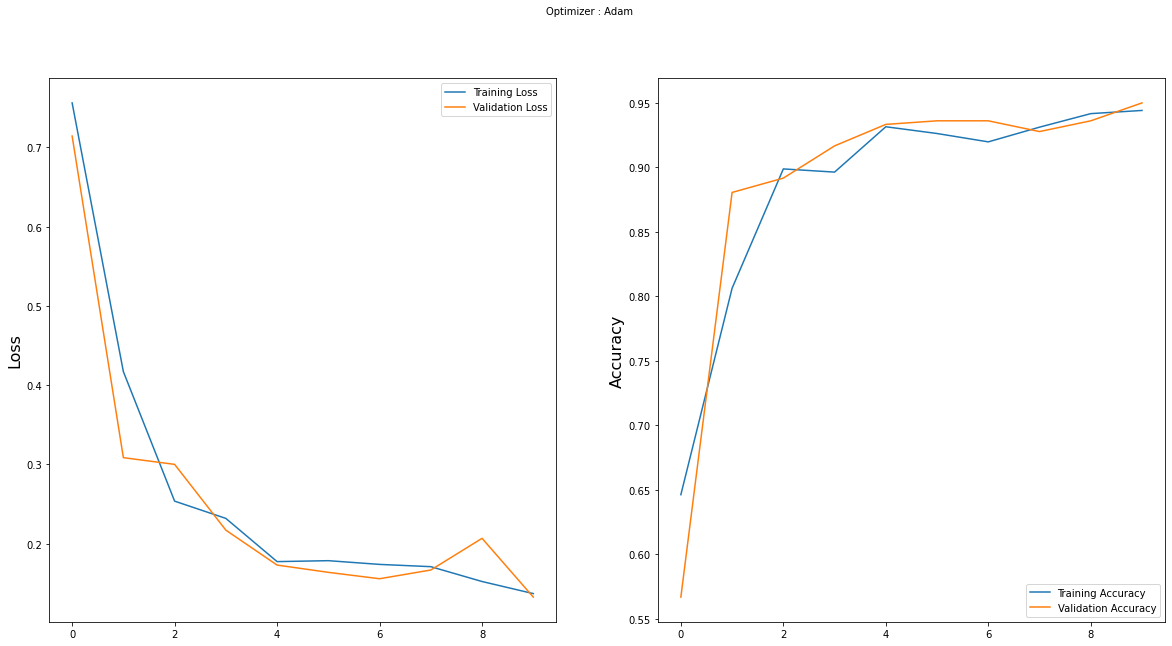

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()